In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering & ML
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix

# Bias Detection
from fairlearn.metrics import (
    demographic_parity_difference,
    equalized_odds_difference,
    selection_rate
)

In [2]:
# dataset from kaggle - https://www.kaggle.com/datasets/prosperchuks/health-dataset

df = pd.read_csv("diabetes_data.csv", sep=",")
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


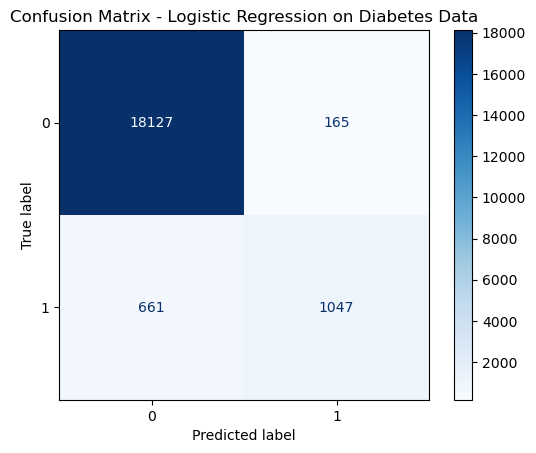


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.86      0.61      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Step 1: Separate features and target
X = df.drop(columns=['Diabetes'])  # Features
y = df['Diabetes']                 # Target

# Convert categorical columns (like 'Sex') if necessary
X = pd.get_dummies(X, drop_first=True)

# Step 2: Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
df = pd.read_csv('diabetes_dataset.csv')  # Update the path if needed

# Encode categorical variables
df_clean = df.copy()
label_encoders = {}
for col in ['gender', 'smoking_history']:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

# Separate features and target
X = df_clean.drop('diabetes', axis=1)
y = df_clean['diabetes']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to DataFrame for easier handling
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 5: Predict and plot confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression on Diabetes Data")
plt.show()

# Optional: Detailed performance
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

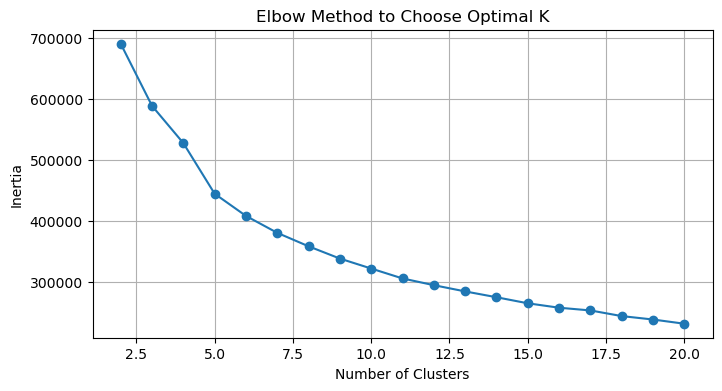

In [4]:
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["OMP_NUM_THREADS"] = "1"  # Limit OpenMP threads

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
cluster_range = range(2, 21)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method to Choose Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [5]:
# Apply KMeans with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled_df)

# Add the cluster labels back to the original data
X_scaled_df['cluster'] = cluster_labels
df_clean['cluster'] = cluster_labels

# See how many records are in each cluster
print(df_clean['cluster'].value_counts())

cluster
1    40382
0    26801
3    22306
2     6569
4     3942
Name: count, dtype: int64


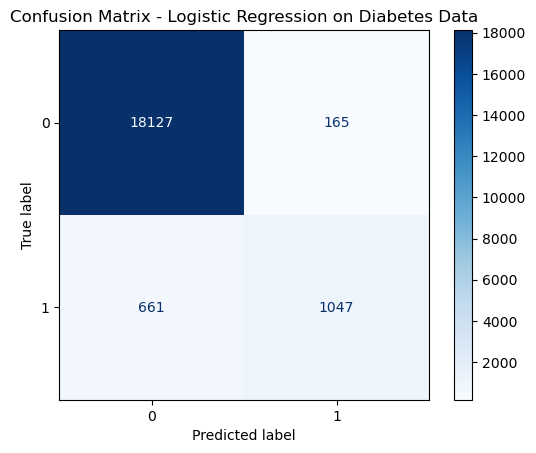


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.86      0.61      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



In [6]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Step 2: Load dataset
df = pd.read_csv("diabetes_data.csv")
# print("Shape of dataset:", df.shape)
# print("\nFirst 5 rows:")
# print(df.head())

# # Step 3: Check for columns
# print("\nColumns:")
# print(df.columns)

# # Step 4: Check for null values
# print("\nMissing values:")
# print(df.isnull().sum())

# # Step 5: Basic statistics
# print("\nStatistical summary:")
# print(df.describe())

# # Step 6: Check target and sensitive attributes
# print("\nValue counts for 'Outcome':")
# print(df['Diabetes'].value_counts())

# print("\nChecking if 'gender' or similar column exists:")
# for col in df.columns:
#     if 'gender' in col.lower():
#         print(f"Found possible gender column: {col}")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Step 1: Separate features and target
X = df.drop(columns=['Diabetes'])  # Features
y = df['Diabetes']                 # Target

# Convert categorical columns (like 'Sex') if necessary
X = pd.get_dummies(X, drop_first=True)

# Step 2: Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
df = pd.read_csv('diabetes_dataset.csv')  # Update the path if needed

# Encode categorical variables
df_clean = df.copy()
label_encoders = {}
for col in ['gender', 'smoking_history']:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

# Separate features and target
X = df_clean.drop('diabetes', axis=1)
y = df_clean['diabetes']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to DataFrame for easier handling
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 5: Predict and plot confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression on Diabetes Data")
plt.show()

# Optional: Detailed performance
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

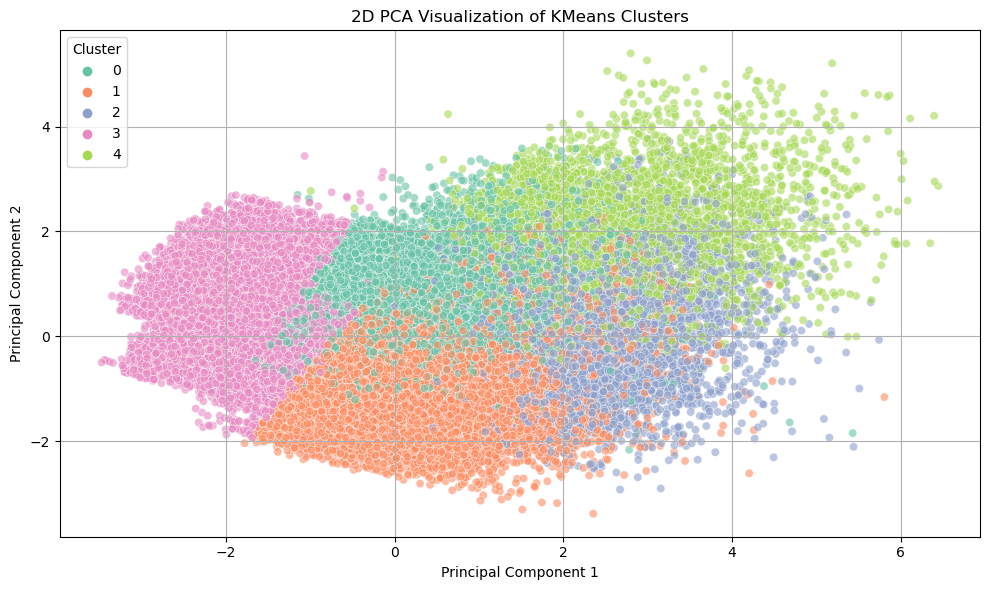

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ If 'cluster' is not already in X_scaled_df, add it:
if 'cluster' not in X_scaled_df.columns:
    kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
    X_scaled_df['cluster'] = kmeans.fit_predict(X_scaled_df)

# ✅ Now drop 'cluster' and apply PCA
X_features_only = X_scaled_df.drop(columns=['cluster'])
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_features_only)

# ✅ Create a DataFrame for plotting
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = X_scaled_df['cluster']

# ✅ Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=pca_df,
    x='PC1', y='PC2',
    hue='Cluster',
    palette='Set2',
    alpha=0.6
)
plt.title('2D PCA Visualization of KMeans Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


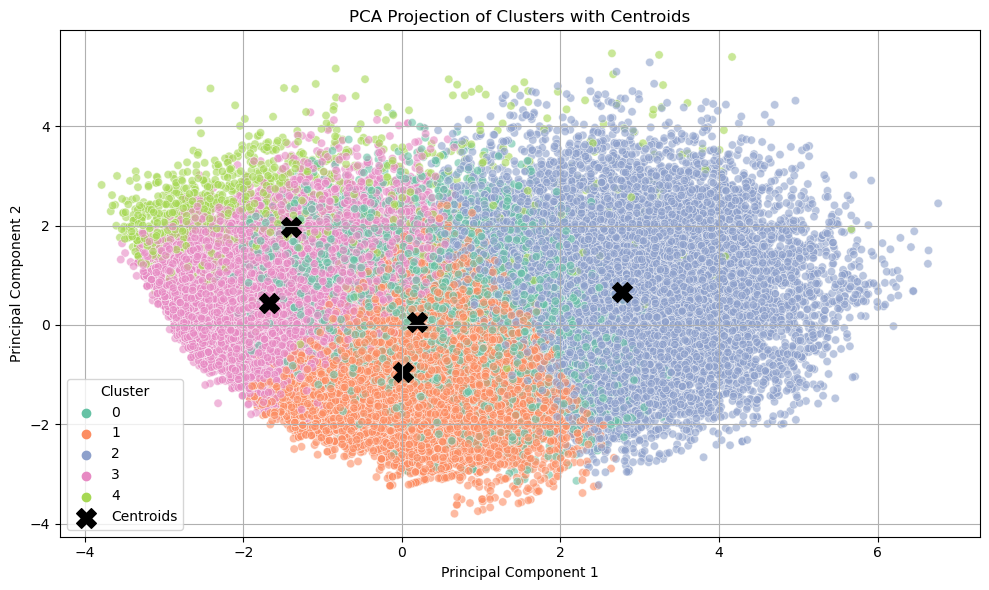

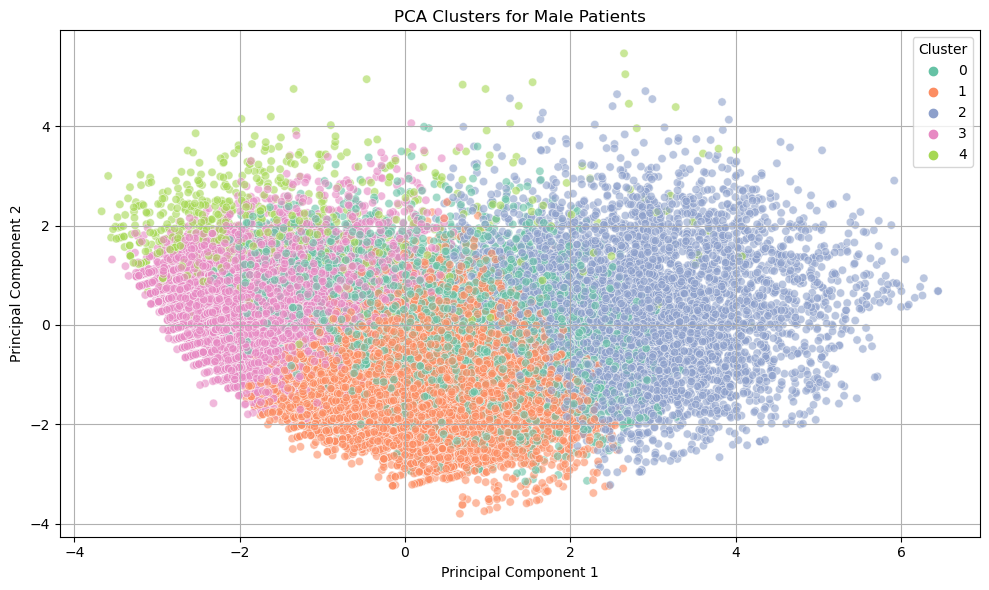

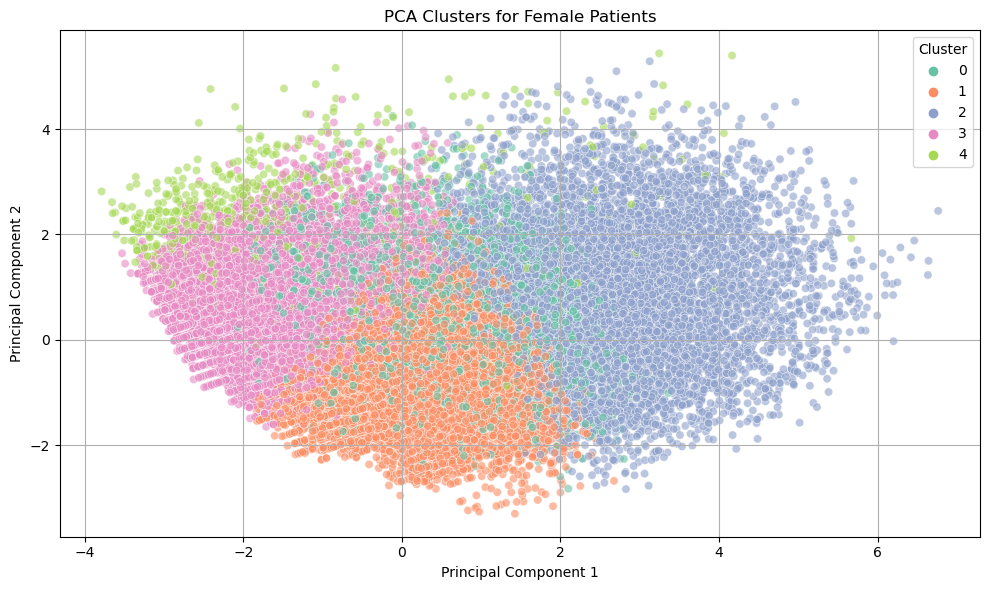

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 📌 Step 1: Load and prepare dataset
df = pd.read_csv("diabetes_data.csv")  # Replace with correct path if needed

# 📌 Step 2: Drop target column and scale features
X = df.drop(columns=['Diabetes'])  # Target = 'Diabetes'
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# 📌 Step 3: Apply KMeans and assign clusters
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
X_scaled_df['cluster'] = kmeans.fit_predict(X_scaled_df)

# 📌 Step 4: Prepare df_clean with cluster and gender columns
df_clean = df.copy()
df_clean['cluster'] = X_scaled_df['cluster']

# If not already present, create 'gender' column from 'Sex'
if 'gender' not in df_clean.columns:
    df_clean['gender'] = df_clean['Sex']  # 0 = Female, 1 = Male

# ✅ Step 5: Perform PCA
pca_features = X_scaled_df.drop(columns=['cluster'])  # Drop cluster before PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(pca_features)

# ✅ Step 6: Transform KMeans cluster centroids to PCA space
kmeans.fit(pca_features)
centroids_pca = pca.transform(kmeans.cluster_centers_)

# ✅ Step 7: Create plotting DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = X_scaled_df['cluster']
pca_df['Gender'] = df_clean['gender'].replace({0: 'Female', 1: 'Male'})

# ✅ Step 8: Plot all clusters with centroids
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=pca_df, x='PC1', y='PC2', hue='Cluster',
    palette='Set2', alpha=0.6
)
plt.scatter(
    centroids_pca[:, 0], centroids_pca[:, 1],
    c='black', s=200, marker='X', label='Centroids'
)
plt.title('PCA Projection of Clusters with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

# ✅ Step 9: Plot PCA clusters separately for Male and Female
for gender in ['Male', 'Female']:
    subset = pca_df[pca_df['Gender'] == gender]
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x='PC1', y='PC2',
        hue='Cluster',
        data=subset,
        palette='Set2',
        alpha=0.6
    )
    plt.title(f'PCA Clusters for {gender} Patients')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


<Figure size 1000x600 with 0 Axes>

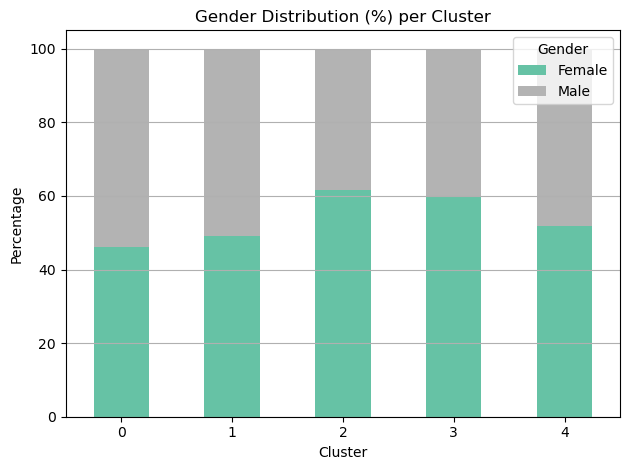

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Copy the cluster and gender data
gender_cluster_df = df_clean[['cluster', 'gender']].copy()
gender_cluster_df['Gender'] = gender_cluster_df['gender'].replace({0: 'Female', 1: 'Male'})

# Step 2: Count gender per cluster
gender_counts = gender_cluster_df.groupby(['cluster', 'Gender']).size().unstack().fillna(0)

# Step 3: Convert to percentages
gender_percent = gender_counts.div(gender_counts.sum(axis=1), axis=0) * 100

# Step 4: Plot
plt.figure(figsize=(10, 6))
gender_percent.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Gender Distribution (%) per Cluster')
plt.ylabel('Percentage')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [10]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)

# ✅ Ensure df_clean is ready with correct column names
# If not already created, create it like this:
# df_clean = df.copy()
# df_clean['gender'] = df_clean['Sex']
# df_clean['cluster'] = X_scaled_df['cluster']

# ✅ Initialize results list
results = []

# ✅ Loop through each cluster
for cluster_id in sorted(df_clean['cluster'].unique()):
    cluster_data = df_clean[df_clean['cluster'] == cluster_id]
    
    for gender_code, gender_label in zip([0, 1], ['Male', 'Female']):
        # ✅ Filter by gender
        gender_data = cluster_data[cluster_data['gender'] == gender_code]

        # ✅ Define features and target (use correct 'Diabetes' column name)
        if 'Diabetes' not in gender_data.columns:
            print(f"Skipping cluster {cluster_id} for {gender_label}: 'Diabetes' not found.")
            continue

        # Skip if too small or only one class (to avoid training errors)
        if len(gender_data) < 100 or len(gender_data['Diabetes'].unique()) < 2:
            continue

        X = gender_data.drop(columns=['Diabetes', 'cluster'])
        y = gender_data['Diabetes']

        # ✅ Train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        # ✅ Train logistic regression
        model = LogisticRegression(max_iter=1000)
        model.fit(X_train, y_train)

        # ✅ Predictions
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        # ✅ Metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        auc = roc_auc_score(y_test, y_prob)

        # ✅ Save results
        results.append({
            'Cluster': cluster_id,
            'Gender': gender_label,
            'Samples': len(gender_data),
            'Accuracy': round(accuracy, 3),
            'Precision': round(precision, 3),
            'Recall': round(recall, 3),
            'F1 Score': round(f1, 3),
            'AUC': round(auc, 3)
        })

# ✅ Create and sort results DataFrame
results_df = pd.DataFrame(results)
results_df['Gender'] = results_df['Gender'].astype(str)
sorted_df = results_df.sort_values(by=['Cluster', 'Gender']).reset_index(drop=True)

# ✅ Display results
print("\nCluster-wise Gender Bias Evaluation:")
display(sorted_df)



Cluster-wise Gender Bias Evaluation:


,Cluster,Gender,Samples,Accuracy,Precision,Recall,F1 Score,AUC
0,0,Female,5788,0.694,0.700,0.779,0.737,0.746
1,0,Male,4964,0.723,0.710,0.822,0.762,0.773
2,1,Female,12043,0.680,0.692,0.884,0.776,0.695
3,1,Male,11604,0.680,0.685,0.864,0.764,0.718
4,2,Female,4990,0.774,0.787,0.966,0.868,0.706
5,2,Male,7988,0.777,0.782,0.972,0.867,0.714
6,3,Female,8642,0.807,0.629,0.238,0.346,0.798
7,3,Male,12924,0.833,0.583,0.184,0.280,0.798
8,4,Female,843,0.834,0.600,0.375,0.462,0.843
9,4,Male,906,0.863,0.462,0.250,0.324,0.785


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# STEP 1: Load & prepare dataset (already done earlier)
df = pd.read_csv("diabetes_data.csv")

# STEP 2: Scale features
X = df.drop(columns=['Diabetes'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# STEP 3: KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
X_scaled_df['cluster'] = kmeans.fit_predict(X_scaled_df)

# STEP 4: Prepare df_clean
df_clean = df.copy()
df_clean['cluster'] = X_scaled_df['cluster']  # ✅ Add cluster
df_clean['Gender'] = df_clean['Sex'].replace({0: 'Female', 1: 'Male'})  # map for plot labels


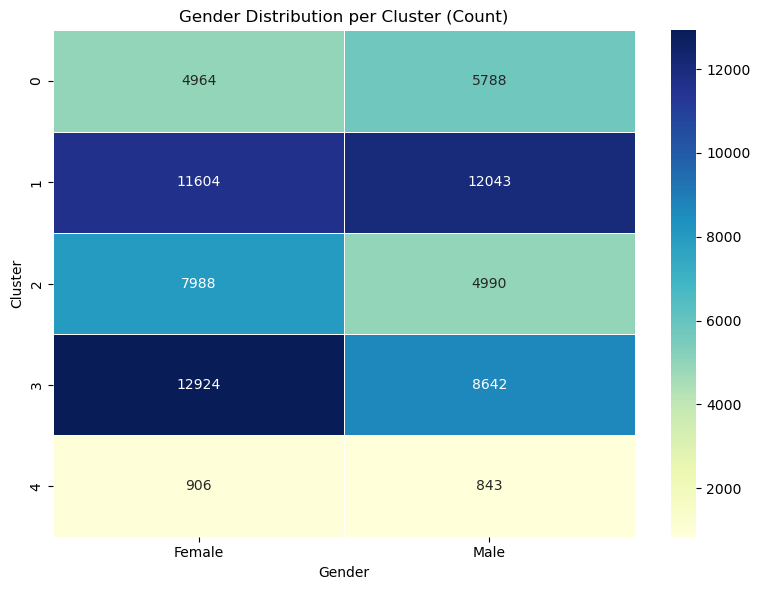

In [12]:
# Group by cluster and gender, count occurrences
gender_cluster_df = df_clean[['cluster', 'Gender']]
heatmap_data = gender_cluster_df.groupby(['cluster', 'Gender']).size().unstack(fill_value=0)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5)
plt.title("Gender Distribution per Cluster (Count)")
plt.xlabel("Gender")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()
